*Creado por:*

*Isabel Maniega*

# PATRONES DE DISEÑO MÁS COMUNES EN PYTHON

1) [Creación](#Creación)
2) [Estructurales](#Estructurales)
3) [De comportamiento](#De-comportamiento)

In [1]:
from IPython.display import Image

# Creación

1) [Singleton](#Singleton)
2) [Builder](#Builder)
3) [Clases abstractas (Abstract classes)](#clases-abstractas-(Abstract-classes))
4) [Factory Method](#Factory-Method)
5) [Prototype](#Prototype)


La mayoría de lenguajes orientados a objeto, la creación de un nuevo objeto tiene lugar en dos fases:

1) Se crea el objeto en sí, "vacío" por así decir.
2) Se inicializa el objeto asignándole valores a sus propiedades

El paso 1 suele ser automático y transparente para el programador. Es decir, el entorno de ejecución del lenguaje que sea se ocupa del detalle de crear el objeto (reservar memoria en el heap, asociar el código de los diferentes métodos con el objeto creado, etc.)

El paso 2 en cambio exige la colaboración del programador, quien debe escribir un método especial dentro del objeto llamado su constructor.

Personalmente encuentro la palabra constructor un poco equívoca, pues tiene connotaciones de "creación", pero en realidad el constructor no se ocupa de crear el objeto, sino sólo de asignar valores iniciales a sus atributos (quizás llamando al constructor de la clase base, en caso de herencia). A mi me gustaría más que ese método se llamara inicializador en lugar de constructor.

En el caso de Python ambas etapas están claramente separadas en dos métodos especiales (o dunder, por que tienen un double underscore). Son los siguientes:

- ```__new__()``` Este es el método encargado de crear al objeto, pero no de asignarle valores iniciales. Debe retornar como resultado el objeto que ha creado. Recibe como parámetro la clase a la que se supone que debería pertenecer el objeto creado. Cabe esperar que el objeto que se crea y se retorna desde ```__new__()``` pertenecerá a esa clase también, pero realmente no es obligatorio (lo que puede llevar a cosas bien raras)

- ```__init__()``` este es el método encargado de asignar valores iniciales al objeto creado desde ```__new__()```. Como primer parámetro recibe el objeto en cuestión que debe ser inicializado (típicamente el parámetro a través del cual lo recibe se llama self).

No es muy habitual proporcionar tu propia implementación de ```__new__()```. Al no hacerlo, tu clase heredará la implementación de object.```__new__()``` que forma parte del lenguaje y que crea un objeto genérico, del tipo apropiado, y retorna ese objeto. Sí es habitual en cambio proporcionar tu implementación de ```__init__()``` para asignar valores iniciales a ese objeto creado.

## Singleton

Un patrón Singleton en Python es un patrón de diseño que permite crear solo una instancia de una clase durante la vida útil de un programa. El uso de un patrón Singleton tiene muchos beneficios. Algunos de ellos son:

- Para limitar el acceso simultáneo a un recurso compartido.
- Para crear un punto de acceso global para un recurso.
- Crear sólo una instancia de una clase, durante la vida útil de un programa.

**Diferentes formas de implementar un Singleton:**

Un patrón singleton se puede implementar de tres maneras diferentes. Son las siguientes:

- Singleton a nivel de módulo
- Singleton clásico
- Borg Singleton

**Singleton a nivel de módulo:**

Todos los módulos son singleton, por definición. Vamos a crear un singleton simple a nivel de módulo donde los datos se comparten entre otros módulos. Aquí crearemos tres archivos de Python (singleton.py, module1.py y module2.py) en los que los demás módulos de muestra comparten una variable de singleton.py. 

In [ ]:
# singleton.py

shared_variable = "Variable compartida"

In [ ]:
# modulo1.py

import singleton 

print("Antes de modificarlo: ",\
      singleton.shared_variable)
singleton.shared_variable +=\
       "(modificado por samplemodule1)"

In [ ]:
# modulo2.py

import singleton 

print("Variable modulo 2: ",\
      singleton.shared_variable)

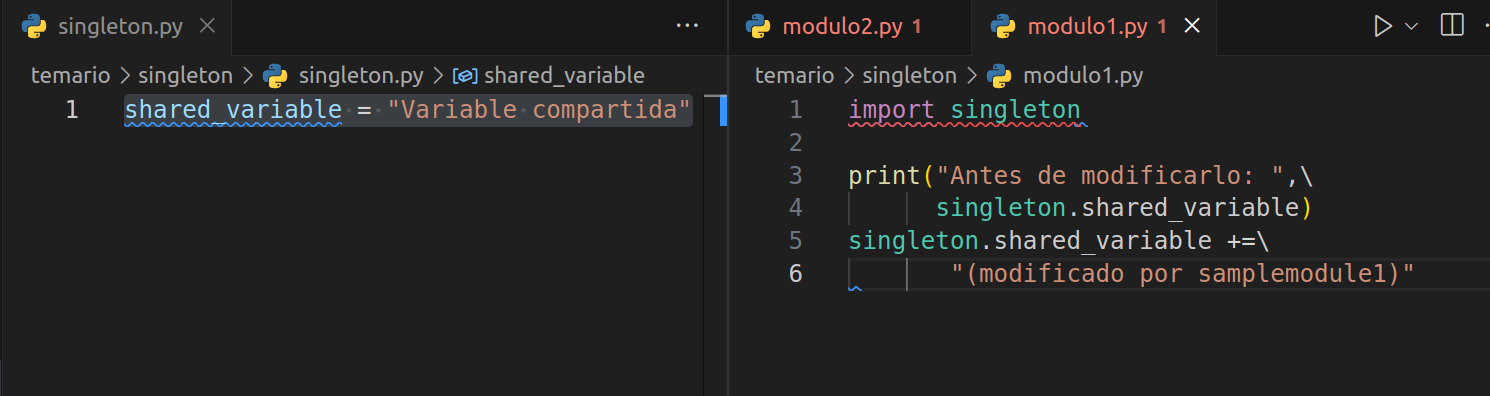

In [2]:
Image(filename='./images/singleton_1.png') 

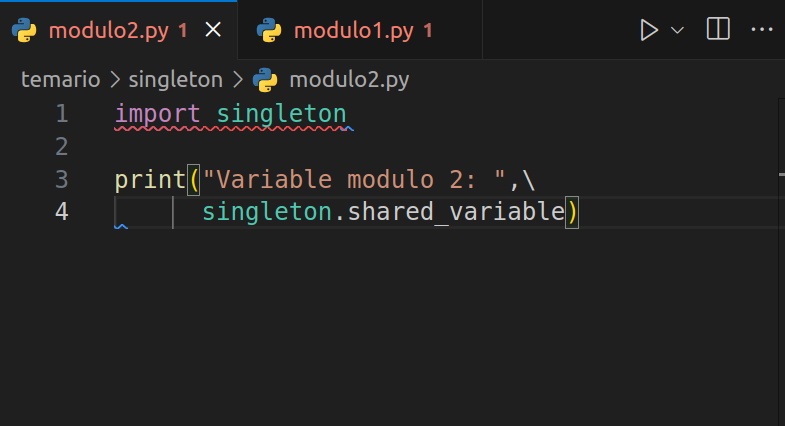

In [3]:
Image(filename='./images/singleton_2.png') 

Accedemos a el IDLE de python mediante:
```
python
```

A continuación importamos el modulo 1 y el modulo2:
```
import modulo1

import modulo2
```


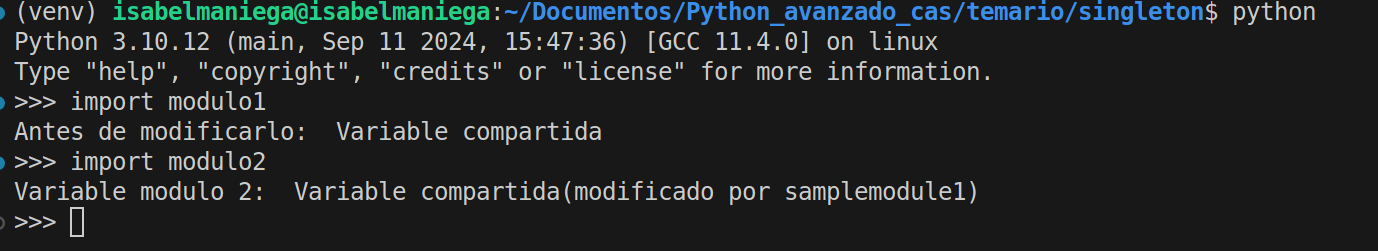

In [4]:
Image(filename='./images/ejecucion_1.png') 

Aquí, el valor cambiado por module1 también se refleja en module2.

**Singleton clásico:**

Classic Singleton crea una instancia solo si no se ha creado ninguna instancia hasta el momento; de lo contrario, devolverá la instancia que ya se creó. Echemos un vistazo al código siguiente.

In [11]:
class SingletonClass(object):
    def __new__(cls):
        if not hasattr(cls, 'instance'):
            cls.instance = super(SingletonClass, cls).__new__(cls)
        return cls.instance
  
singleton = SingletonClass()
new_singleton = SingletonClass()

print(singleton is new_singleton)

singleton.singl_variable = "Singleton Variable"
print(new_singleton.singl_variable)

True
Singleton Variable


Aquí, en el método ```__new__```, comprobaremos si se ha creado una instancia o no. Si se ha creado, devolverá la instancia; de lo contrario, creará una nueva instancia. Puedes observar que singleton y new_singleton devuelven la misma instancia y tienen la misma variable.

Veamos qué sucede cuando subclasificamos una clase singleton. 

In [12]:
class SingletonClass(object):
    def __new__(cls):
        if not hasattr(cls, 'instance'):
            cls.instance = super(SingletonClass, cls).__new__(cls)
        return cls.instance
  
class SingletonChild(SingletonClass): # Hereda de la clase anterior
    pass
  
singleton = SingletonClass()  
child = SingletonChild()
print(child is singleton)

singleton.singl_variable = "Singleton Variable"
print(child.singl_variable)

True
Singleton Variable


Aquí, puedes ver que SingletonChild tiene la misma instancia de SingletonClass y también comparte el mismo estado. Pero hay escenarios en los que necesitamos una instancia diferente, pero deberíamos compartir el mismo estado. Este intercambio de estados se puede lograr usando Borg Singleton.

**Borg Singleton:**

Borg singleton es un patrón de diseño en Python que permite compartir estados entre distintas instancias. Veamos el código siguiente.

In [13]:
class BorgSingleton(object):
  _shared_borg_state = {}
  
  def __new__(cls, *args, **kwargs):
    obj = super(BorgSingleton, cls).__new__(cls, *args, **kwargs)
    obj.__dict__ = cls._shared_borg_state
    return obj
  
borg = BorgSingleton()
borg.shared_variable = "Shared Variable"

class ChildBorg(BorgSingleton):
  pass

childBorg = ChildBorg()
print(childBorg is borg)
print(childBorg.shared_variable)

False
Shared Variable


Junto con el proceso de creación de una nueva instancia, también se define un estado compartido en el método ```__new__```. Aquí, el estado compartido se conserva mediante el atributo shared_borg_state y se almacena en el diccionario ```__dict__``` de cada instancia.

Si desea un estado diferente, puede restablecer el atributo shared_borg_state. Veamos cómo restablecer un estado compartido.

In [14]:
class BorgSingleton(object):
  _shared_borg_state = {}
  
  def __new__(cls, *args, **kwargs):
    obj = super(BorgSingleton, cls).__new__(cls, *args, **kwargs)
    obj.__dict__ = cls._shared_borg_state
    return obj
  
borg = BorgSingleton()
borg.shared_variable = "Shared Variable"

class NewChildBorg(BorgSingleton):
    _shared_borg_state = {} # SE INICIALIZA EN VACIO!!

newChildBorg = NewChildBorg()
print(newChildBorg.shared_variable)

AttributeError: 'NewChildBorg' object has no attribute 'shared_variable'

Aquí, hemos restablecido el estado compartido e intentamos acceder a shared_variable. Veamos el error, debido a que al iniciar el objeto la variable _shared_borg_state, es un diccionario vacio.

**Casos de uso de un Singleton:**

Enumeremos algunos de los casos de uso de una clase singleton. Son los siguientes:

- Administrar una conexión de base de datos
- Acceso global al punto de escritura de mensajes de registro
- Gestor de archivos
- Cola de impresión

## Builder

El patrón constructor es un patrón de diseño popular que se utiliza en la programación orientada a objetos para crear objetos complejos con muchos parámetros opcionales. Separa la construcción de un objeto de su representación y proporciona una interfaz intuitiva y flexible para crear objetos. Exploraremos el patrón constructor en Python y mostraremos cómo se puede utilizar para crear un objeto de automóvil.

**El patrón Builder en Python**

En Python, el patrón de construcción se implementa mediante clases y métodos. Se crea una clase de construcción que contiene métodos para configurar los parámetros del objeto que se está creando. La clase de construcción también contiene un método de construcción que crea y devuelve el objeto. Este método suele ser el último método al que se llama en la cadena de llamadas de método que configura los parámetros del objeto.  

A continuación se muestra un ejemplo de implementación del patrón constructor en Python:

In [15]:
class Car:
    """        
        Variables de un coche sin patrón de construcción.*
        
        Atributos:
        ---------
        make: str
            Marca del vehículo
        model: str
            Modelo del vehículo
        year: int
            Año de fabricación del vehículo 
        color: str
            Color del vehículo
        num_doors: int
            Número de puertas
        gps: boolean
            Sí tiene o no GPS
        
    """

    def __init__(self, make, model, year, 
                 color, num_doors, gps=False):
        self.make = make
        self.model = model
        self.year = year
        self.color = color
        self.num_doors = num_doors
        self.gps = gps


class CarBuilder:
    """        
        Variables de un coche con patrón de construcción.*
        
        Atributos:
        ---------
        make: str
            Marca del vehículo
        model: str
            Modelo del vehículo
        year: int
            Año de fabricación del vehículo 
        color: str
            Color del vehículo
        num_doors: int
            Número de puertas
        gps: boolean
            Sí tiene o no GPS

        Métodos:
        -------
        set_make: retorna la marca del vehiculo, por defecto make es None
        set_model: retorna el modelo del vehiculo, por defecto model es None
        set_year: retorna el año de fabricación del vehiculo, por defecto year es None
        set_color: retorna el color del vehiculo, por defecto color es None
        set_num_doors: retorna el numero de puertas del vehiculo, por defecto num_doors es None
        set_gps: retorna si tiene GPS el vehiculo, por defecto gps es False
        build: retorna el objeto a partir de la clase Car
        
    """
    
    def __init__(self):
        self.make = None
        self.model = None
        self.year = None
        self.color = None
        self.num_doors = None
        self.gps = False

    def set_make(self, make):
        self.make = make
        return self

    def set_model(self, model):
        self.model = model
        return self

    def set_year(self, year):
        self.year = year
        return self

    def set_color(self, color):
        self.color = color
        return self

    def set_num_doors(self, num_doors):
        self.num_doors = num_doors
        return self

    def set_gps(self, gps):
        self.gps = gps
        return self

    def build(self):
        return Car(
            self.make,
            self.model,
            self.year,
            self.color,
            self.num_doors,
            gps = self.gps)

# *Basado en Formato Numpy/scipy

In [16]:
Car.__doc__

'        \n        Variables de un coche sin patrón de construcción.*\n        \n        Atributos:\n        ---------\n        make: str\n            Marca del vehículo\n        model: str\n            Modelo del vehículo\n        year: int\n            Año de fabricación del vehículo \n        color: str\n            Color del vehículo\n        num_doors: int\n            Número de puertas\n        gps: boolean\n            Sí tiene o no GPS\n        \n    '

In [17]:
help(Car)

Help on class Car in module __main__:

class Car(builtins.object)
 |  Car(make, model, year, color, num_doors, gps=False)
 |  
 |  Variables de un coche sin patrón de construcción.*
 |  
 |  Atributos:
 |  ---------
 |  make: str
 |      Marca del vehículo
 |  model: str
 |      Modelo del vehículo
 |  year: int
 |      Año de fabricación del vehículo 
 |  color: str
 |      Color del vehículo
 |  num_doors: int
 |      Número de puertas
 |  gps: boolean
 |      Sí tiene o no GPS
 |  
 |  Methods defined here:
 |  
 |  __init__(self, make, model, year, color, num_doors, gps=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [18]:
help(CarBuilder)

Help on class CarBuilder in module __main__:

class CarBuilder(builtins.object)
 |  Variables de un coche con patrón de construcción.*
 |  
 |  Atributos:
 |  ---------
 |  make: str
 |      Marca del vehículo
 |  model: str
 |      Modelo del vehículo
 |  year: int
 |      Año de fabricación del vehículo 
 |  color: str
 |      Color del vehículo
 |  num_doors: int
 |      Número de puertas
 |  gps: boolean
 |      Sí tiene o no GPS
 |  
 |  Métodos:
 |  -------
 |  set_make: retorna la marca del vehiculo, por defecto make es None
 |  set_model: retorna el modelo del vehiculo, por defecto model es None
 |  set_year: retorna el año de fabricación del vehiculo, por defecto year es None
 |  set_color: retorna el color del vehiculo, por defecto color es None
 |  set_num_doors: retorna el numero de puertas del vehiculo, por defecto num_doors es None
 |  set_gps: retorna si tiene GPS el vehiculo, por defecto gps es False
 |  build: retorna el objeto a partir de la clase Car
 |  
 |  Methods

En esta implementación, tenemos una clase Car que contiene todos los atributos posibles de un automóvil y una clase CarBuilder que contiene métodos para configurar dichos atributos. La clase CarBuilder también contiene un método de construcción que crea y devuelve un objeto Car .          

**Construyendo un coche sin el patrón del constructor**

Para crear un objeto Car sin utilizar el patrón constructor, tendríamos que pasar todos los atributos al constructor al crear el objeto.   

He aquí un ejemplo:

In [19]:
my_car = Car("Toyota", "Camry", 2022, "Blue", 4, gps=True)

Este enfoque funciona bien para una pequeña cantidad de atributos, pero rápidamente se vuelve complicado a medida que aumenta la cantidad de atributos. Además, puede resultar difícil recordar el orden de los atributos, lo que puede generar errores.

**Construyendo un automóvil usando el patrón Builder**

Usando CarBuilder , podemos construir nuestros objetos Car de esta manera: 

In [21]:
builder = CarBuilder()
my_car = builder.set_make("Toyota")\
                .set_model("Camty")\
                .set_year("2022")\
                .set_color("Blue")\
                .set_num_doors("4")\
                .set_gps(True)\
                .build()
print(vars(my_car))

{'make': 'Toyota', 'model': 'Camty', 'year': '2022', 'color': 'Blue', 'num_doors': '4', 'gps': True}


Esta implementación proporciona una interfaz más clara e intuitiva para crear objetos Car. Podemos especificar solo los atributos que queremos y dejar de lado los atributos opcionales.  

**Resumen**

En resumen, el patrón constructor puede simplificar el proceso de creación de objetos complejos con muchos atributos, especialmente si algunos de esos atributos son opcionales. Proporciona una interfaz más clara e intuitiva para la construcción de objetos, lo que puede facilitar la codificación.

##  Clases abstractas (Abstract classes)

Python se considera un lenguaje de programación muy flexible, pero eso no significa que no haya controles para imponer un conjunto de funcionalidades o un orden en una jerarquía de clases. Cuando se desarrolla un sistema en un grupo de programadores, sería útil tener algún medio para establecer requisitos para las clases en materia de interfaces (métodos) expuestos por cada clase.

**¿Qué es una clase abstracta?**
Una clase abstracta debe considerarse un modelo para otras clases, una especie de contrato entre un diseñador de clases y un programador:

- el diseñador de clases establece requisitos con respecto a los métodos que deben implementarse simplemente declarándolos, pero sin definirlos en detalle. Estos métodos se denominan métodos abstractos.
- el programador tiene que entregar todas las definiciones de métodos y la integridad sería validada por otro módulo dedicado. El programador entrega las definiciones de métodos anulando las declaraciones de métodos recibidas del diseñador de clases.

Este contrato le asegura que una clase hija, construida sobre su clase abstracta, estará equipada con un conjunto de métodos concretos impuestos por la clase abstracta.

**¿Por qué queremos usar clases abstractas?**

La razón más importante es que queremos que nuestro código sea polimórfico, por lo que todas las subclases deben entregar un conjunto de sus propias implementaciones de métodos para poder llamarlas usando nombres de métodos comunes.

Además, una clase que contiene uno o más métodos abstractos se llama clase abstracta. Esto significa que las clases abstractas no se limitan a contener solo métodos abstractos: algunos de los métodos ya se pueden definir, pero si alguno de los métodos es abstracto, entonces la clase se vuelve abstracta.

**¿Qué es un método abstracto?**

Un método abstracto es un método que tiene una declaración, pero no tiene ninguna implementación. Daremos algunos ejemplos de dichos métodos para enfatizar su naturaleza abstracta.

Hablemos de un ejemplo:

Supongamos que está diseñando una aplicación de reproducción de música, destinada a admitir múltiples formatos de archivo. Algunos de los formatos ya se conocen, pero otros aún no. La idea es diseñar una clase abstracta que represente un formato de música base y los métodos correspondientes para “abrir”, “reproducir”, “obtener detalles”, “rebobinar”, etc., para mantener el polimorfismo.

Su equipo debe implementar clases concretas para cada formato que desee admitir. Siempre que estén disponibles nuevas especificaciones de formato, no tendrá que volver a trabajar en el código de su reproductor de música, solo tendrá que entregar una clase que admita el nuevo formato de archivo, cumpliendo con el contrato impuesto por la clase abstracta.

Recuerde que no es posible crear una instancia de una clase abstracta y que necesita subclases para proporcionar implementaciones para esos métodos abstractos que se declaran en las clases abstractas. Este comportamiento es una prueba realizada por un módulo Python dedicado para validar si el desarrollador ha implementado una subclase que anula todos los métodos abstractos.

Cuando diseñamos unidades funcionales grandes, en forma de clases, debemos usar una clase abstracta. Cuando queremos proporcionar una funcionalidad implementada común para todas las implementaciones de la clase, también podemos usar una clase abstracta, porque las clases abstractas nos permiten implementar parcialmente clases al entregar definiciones concretas para algunos de los métodos, no solo declaraciones.

Acabamos de definir los medios por los cuales proporcionar una interfaz de programación de aplicaciones (API) común para un conjunto de subclases. Esta capacidad es especialmente útil en situaciones en las que su equipo o un tercero va a proporcionar implementaciones, como con complementos en una aplicación, incluso después de que finalice el desarrollo de la aplicación principal.

### Clases abstractas vs. anulación de métodos

Comencemos con una clase típica que se puede instanciar:

In [22]:
class BluePrint:
    def hello(self):
        print('Nothing is blue unless you need it')
bp = BluePrint()
bp.hello()

Nothing is blue unless you need it


Python ha creado un módulo que proporciona la clase auxiliar para definir las clases base abstractas (ABC) y el nombre de ese módulo es abc.

ABC te permite marcar clases como abstractas y distinguir qué métodos de la clase base abstracta son abstractos. Un método se vuelve abstracto al ser decorado con un decorador @abstractmethod.

Para comenzar con ABC debes:

1. importar el módulo abc;
2. hacer que tu clase base herede la clase auxiliar ABC, que es entregada por el módulo abc;
3. decorar los métodos abstractos con @abstractmethod, que es entregado por el módulo abc.

Cuando ejecutas el código, el resultado no sorprende a nadie:

In [23]:
import abc

class BluePrint(abc.ABC):
    @abc.abstractmethod
    def hello(self):
        pass

class GreenField(BluePrint):
    def hello(self):
        print('Welcome to Green Field!')


gf = GreenField()
gf.hello()

Welcome to Green Field!


Hasta ahora todo funciona bien, así que vamos a jugar un poco con el código.

Ahora intentaremos crear una instancia de la clase BluePrint:

In [24]:
import abc

class BluePrint(abc.ABC):
    @abc.abstractmethod
    def hello(self):
        pass

class GreenField(BluePrint):
    def hello(self):
        print('Welcome to Green Field!')
gf = GreenField()
gf.hello()

bp = BluePrint()

Welcome to Green Field!


TypeError: Can't instantiate abstract class BluePrint with abstract method hello

indica que:

- es posible instanciar la clase GreenField y llamar al método hello, porque el desarrollador de Python ha proporcionado una definición concreta del método hello.
En otras palabras, el desarrollador de Python ha anulado el método abstracto hello con su propia implementación. Cuando la clase base proporciona más métodos abstractos, todos ellos deben anularse en una subclase antes de que la subclase pueda instanciarse.

- Python lanza una excepción TypeError cuando intentamos instanciar la clase base BluePrint, porque contiene un método abstracto.

Ahora intentaremos heredar la clase abstracta y olvidarnos de anular el método abstracto creando una clase RedField que no anule el método hello.

In [25]:
import abc

class BluePrint(abc.ABC):
    @abc.abstractmethod
    def hello(self):
        pass

class GreenField(BluePrint):
    def hello(self):
        print('Welcome to Green Field!')

class RedField(BluePrint):
    def yellow(self):
        pass

gf = GreenField()
gf.hello()

rf = RedField()

Welcome to Green Field!


TypeError: Can't instantiate abstract class RedField with abstract method hello

indica que:

1. es posible instanciar la clase GreenField y llamar al método hello;
2. la clase RedField todavía se reconoce como abstracta, porque hereda todos los elementos de su superclase, que es abstracta, y la clase RedField no anula el método hello abstracto.

In [27]:
import abc

class BluePrint(abc.ABC):
    @abc.abstractmethod
    def hello(self):
        pass

class GreenField(BluePrint):
    def hello(self):
        print('Welcome to Green Field!')

class RedField(GreenField):
    def yellow(self):
        pass

gf = GreenField()
gf.hello()

rf = RedField()
rf.hello()

Welcome to Green Field!
Welcome to Green Field!


**Herencia múltiple**

Cuando planee implementar una herencia múltiple de clases abstractas, recuerde que una subclase efectiva debe anular todos los métodos abstractos heredados de sus superclases.

*Resumen:*
- La clase base abstracta (ABC) es una clase que no se puede instanciar. Dicha clase es una clase base para clases concretas;
- ABC solo se puede heredar de;
- estamos obligados a anular todos los métodos abstractos al entregar implementaciones de métodos concretos.

## Factory Method

Factory Method es un patrón de diseño creacional utilizado para crear implementaciones concretas de una interfaz común.

Separa el proceso de creación de un objeto del código que depende de la interfaz del objeto.

Por ejemplo, una aplicación requiere un objeto con una interfaz específica para realizar sus tareas. La implementación concreta de la interfaz se identifica mediante algún parámetro.

En lugar de utilizar una *if/elif/else* estructura condicional compleja para determinar la implementación concreta, la aplicación delega esa decisión a un componente independiente que crea el objeto concreto. Con este enfoque, el código de la aplicación se simplifica, lo que lo hace más reutilizable y más fácil de mantener.

Imagine una aplicación que necesita convertir un Book objeto en su string representación utilizando un formato específico. La conversión de un objeto a una representación diferente suele denominarse serialización. A menudo verá estos requisitos implementados en una única función o método que contiene toda la lógica y la implementación, como en el siguiente código:

In [29]:
# In serializer_demo.py

import json
import xml.etree.ElementTree as et

class Book:
    def __init__(self, book_id, title, author):
        self.book_id = book_id
        self.title = title
        self.author = author


class BookSerializer:
    def serialize(self, book, format):
        if format == 'JSON':
            book_info = {
                'id': book.book_id,
                'title': book.title,
                'author': book.author
            }
            return json.dumps(book_info)
        elif format == 'XML':
            book_info = et.Element('book', attrib={'id': book.book_id})
            title = et.SubElement(book_info, 'title')
            title.text = book.title
            author = et.SubElement(book_info, 'author')
            author.text = book.author
            return et.tostring(book_info, encoding='unicode')
        else:
            raise ValueError(format)

En el ejemplo anterior, tienes una Book class básica para representar un libro y una BookSerializer class que puede convertir un Book objeto en su string representación según el valor del formato del parámetro.

El método ```.serialize()``` admite dos formatos diferentes: JSON y XML format . No se admiten otros formatos especificados, por lo que ValueError se genera una excepción.

Utilicemos el shell interactivo de Python para ver cómo funciona el código:

In [30]:
book_1 = Book('1', 'Maldito karma', 'David Safier')
serializer = BookSerializer()

In [31]:
serializador = serializer.serialize(book_1, 'JSON')
serializador

'{"id": "1", "title": "Maldito karma", "author": "David Safier"}'

In [32]:
serializador = serializer.serialize(book_1, 'XML')
serializador

'<book id="1"><title>Maldito karma</title><author>David Safier</author></book>'

In [33]:
serializador = serializer.serialize(book_1, 'YAML')
serializador

ValueError: YAML

Creas un book_1 objeto y un serializer, y conviertes el libro a su representación de cadena mediante el método ```.serialize()```. El método toma el book objeto como parámetro, así como un valor de cadena que representa el formato que deseas. La última llamada utiliza YAML como formato , que no es compatible con el serializer, por lo que ValueError, se genera una excepción.

Este ejemplo es breve y simplificado, pero aún así tiene mucha complejidad. Hay tres rutas lógicas o de ejecución según el valor del formato parámetro. Puede que esto no parezca gran cosa y probablemente hayas visto código con mayor complejidad que este, pero el ejemplo anterior sigue siendo bastante difícil de mantener.

**Los problemas con el código condicional complejo**

El ejemplo anterior muestra todos los problemas que encontrará en el código lógico complejo. El código lógico complejo utiliza *if/elif/else* estructuras para cambiar el comportamiento de una aplicación. El uso de *if/elif/else* estructuras condicionales hace que el código sea más difícil de leer, comprender y mantener.

El código anterior puede no parecer difícil de leer o entender, ¡pero espera a ver el código final en esta sección!

Sin embargo, el código anterior es difícil de mantener porque hace demasiado. El principio de responsabilidad única establece que un módulo , una clase o incluso un método deben tener una única responsabilidad bien definida. Deben hacer una sola cosa y tener un solo motivo para cambiar.

El método ```.serialize()``` en cuestión BookSerializer requerirá cambios por muchos motivos diferentes. Esto aumenta el riesgo de introducir nuevos defectos o interrumpir la funcionalidad existente cuando se realizan cambios. Echemos un vistazo a todas las situaciones que requerirán modificaciones en la implementación:

- Cuando se introduce un nuevo formato: el método deberá cambiar para implementar la serialización a ese formato.

- Cuando el Book objeto cambia: Agregar o quitar propiedades a la Songclase requerirá que la implementación cambie para adaptarse a la nueva estructura.

- Cuando cambia la representación de cadena para un formato ( JSON simple vs API JSON ): el método ```.serialize()``` tendrá que cambiar si cambia la representación de cadena deseada para un formato porque la representación está codificada en la ```.serialize()``` implementación del método.

La situación ideal sería que cualquiera de esos cambios en los requisitos se pudiera implementar sin cambiar el método ```.serialize()```. Veamos cómo puede hacerlo en las siguientes secciones.

**En busca de una interfaz común**

El primer paso cuando ves código condicional complejo en una aplicación es identificar el objetivo común de cada una de las rutas de ejecución (o rutas lógicas).

El código que se utiliza *if/elif/else* suele tener un objetivo común que se implementa de distintas maneras en cada ruta lógica. El código anterior convierte un Book objeto a su string representación utilizando un formato diferente en cada ruta lógica.

En función del objetivo, se busca una interfaz común que se pueda utilizar para reemplazar cada una de las rutas. El ejemplo anterior requiere una interfaz que tome un Book objeto y devuelva un string.

Una vez que tenga una interfaz común, proporcione implementaciones independientes para cada ruta lógica. En el ejemplo anterior, proporcionará una implementación para serializar en JSON y otra para XML.

Luego, proporciona un componente independiente que decide la implementación concreta que se utilizará en función del valor especificado del formato. Este componente evalúa el valor de formato y devuelve la implementación concreta identificada por su valor.

Vamos a realizar cambios en el código existente sin cambiar el comportamiento, esto se conoce como refactorización del código.

**Refactorización del código en la interfaz deseada**

La interfaz deseada es un objeto o una función que toma un Book objeto y devuelve una string representación.

El primer paso es refactorizar una de las rutas lógicas en esta interfaz. Para ello, se agrega un nuevo método ```._serialize_to_json()``` y se mueve el código de serialización JSON hacia él. Luego, se cambia el cliente para que lo llame en lugar de tener la implementación en el cuerpo de la declaración if:

In [ ]:
class BookSerializer:
    def serialize(self, book, format):
        if format == 'JSON':
            return self._serialize_to_json(book)

    def _serialize_to_json(self, book):
        payload = {
            'id': book.book_id,
            'title': book.title,
            'artist': book.author
        }
        return json.dumps(payload)

Una vez que realices este cambio, podrás verificar que el comportamiento no haya cambiado. Luego, haz lo mismo con la opción XML introduciendo un nuevo método ```._serialize_to_xml()```, moviendo la implementación hacia él y modificando la ruta elif para llamarlo.

El siguiente ejemplo muestra el código refactorizado:

In [34]:
class BookSerializer:
    def serialize(self, book, format):
        if format == 'JSON':
            return self._serialize_to_json(book)
        elif format == 'XML':
            return self._serialize_to_xml(book)
        else:
            raise ValueError(format)

    def _serialize_to_json(self, book):
        payload = {
            'id': book.book_id,
            'title': book.title,
            'artist': book.author
        }
        return json.dumps(payload)

    def _serialize_to_xml(self, book):
        book_element = et.Element('song', attrib={'id': book.book_id})
        title = et.SubElement(book_element, 'title')
        title.text = book.title
        author = et.SubElement(book_element, 'author')
        author.text = book.artist
        return et.tostring(book_element, encoding='unicode')

La nueva versión del código es más fácil de leer y entender, pero aún se puede mejorar con una implementación básica del Método Fábrica.

**Implementación básica del método Factory**

La idea central de Factory Method es proporcionar un componente independiente con la responsabilidad de decidir qué implementación concreta se debe utilizar en función de un parámetro específico. Ese parámetro en nuestro ejemplo es format.

Para completar la implementación del método Factory, se agrega un nuevo método ```._get_serializer()``` que toma el valor deseado de formato. Este método evalúa el valor del formato y devuelve la función de serialización correspondiente:

In [ ]:
class BookSerializer:
    def _get_serializer(self, format):
        if format == 'JSON':
            return self._serialize_to_json
        elif format == 'XML':
            return self._serialize_to_xml
        else:
            raise ValueError(format)

**Nota:** El método ```._get_serializer()``` no llama a la implementación concreta y solo devuelve el objeto de función en sí.

Ahora, puedes cambiar el método ```.serialize()``` que BookSerializerse utilizará ```._get_serializer()``` para completar la implementación del método Factory. El siguiente ejemplo muestra el código completo:

In [35]:
class BookSerializer:
    def serialize(self, book, format):
        serializer = self._get_serializer(format)
        return serializer(book)

    def _get_serializer(self, format):
        if format == 'JSON':
            return self._serialize_to_json
        elif format == 'XML':
            return self._serialize_to_xml
        else:
            raise ValueError(format)

    def _serialize_to_json(self, book):
        payload = {
            'id': book.book_id,
            'title': book.title,
            'artist': book.author
        }
        return json.dumps(payload)

    def _serialize_to_xml(self, book):
        book_element = et.Element('book', attrib={'id': book.book_id})
        title = et.SubElement(book_element, 'title')
        title.text = book.title
        author = et.SubElement(book_element, 'artist')
        author.text = book.author
        return et.tostring(book_element, encoding='unicode')

La implementación final muestra los diferentes componentes de Factory Method. El método ```.serialize()``` es el código de la aplicación que depende de una interfaz para completar su tarea.

Esto se conoce como el componente cliente del patrón. La interfaz definida se conoce como el componente producto. En nuestro caso, el producto es una función que toma Book y devuelve una representación de cadena.

Los métodos ```._serialize_to_json()``` y ```._serialize_to_xml()``` son implementaciones concretas del producto. Por último, el método ```._get_serializer()``` es el componente creador. El creador decide qué implementación concreta utilizar.

Debido a que comenzó con algún código existente, todos los componentes de Factory Method son miembros de la misma clase BookSerializer.

Generalmente no es así y, como se puede observar, ninguno de los métodos añadidos utiliza el parámetro self. Esto es un buen indicio de que no deberían ser métodos de la BookSerializer class y pueden convertirse en funciones externas:

In [36]:
class BookSerializer:
     
    def serialize(self, book, format):
        serializer = get_serializer(format)
        return serializer(book)


def get_serializer(format):
    if format == 'JSON':
        return _serialize_to_json
    elif format == 'XML':
        return _serialize_to_xml
    else:
        raise ValueError(format)


def _serialize_to_json(book):
        payload = {
            'id': book.book_id,
            'title': book.title,
            'artist': book.author
        }
        return json.dumps(payload)

def _serialize_to_xml(book):
    book_element = et.Element('book', attrib={'id': book.book_id})
    title = et.SubElement(book_element, 'title')
    title.text = book.title
    author = et.SubElement(book_element, 'artist')
    author.text = book.author
    return et.tostring(book_element, encoding='unicode')

**Nota:** El método ```.serialize()``` en BookSerializer no utiliza el self parámetro.

La regla anterior nos dice que no debe ser parte de la clase. Esto es correcto, pero estás trabajando con código existente.

Si elimina BookSerializer y cambia el método ```.serialize()``` a una función, entonces tendrá que cambiar todas las ubicaciones en la aplicación que usan BookSerializer y reemplazar las llamadas a la nueva función.

A menos que tenga un porcentaje muy alto de cobertura de código con sus pruebas unitarias, este no es un cambio que debería realizar.

La mecánica de Factory Method es siempre la misma. Un cliente ```BookSerializer.serialize()``` depende de una implementación concreta de una interfaz. Solicita la implementación a un componente creador ```get_serializer()``` utilizando algún tipo de identificador ```format```.

El creador devuelve la implementación concreta según el valor del parámetro al cliente, y el cliente utiliza el objeto proporcionado para completar su tarea.

Puede ejecutar el mismo conjunto de instrucciones en el intérprete interactivo de Python para verificar que el comportamiento de la aplicación no ha cambiado:

In [37]:
book_1 = Book('1', 'Maldito karma', 'David Safier')
serializer = BookSerializer()

In [38]:
serializador = serializer.serialize(book_1, 'JSON')
serializador

'{"id": "1", "title": "Maldito karma", "artist": "David Safier"}'

In [39]:
serializador = serializer.serialize(book_1, 'XML')
serializador

'<book id="1"><title>Maldito karma</title><artist>David Safier</artist></book>'

In [40]:
serializador = serializer.serialize(book_1, 'YAML')
serializador

ValueError: YAML

Creas un Book y un serializer, y usas el serializer para convertir el libro a su representación string especificando un format. Como YAML no es un formato compatible, ValueError se genera.

**Conclusión**

Factory Method es un patrón de diseño creacional ampliamente utilizado que se puede utilizar en muchas situaciones donde existen múltiples implementaciones concretas de una interfaz.

El patrón elimina el código lógico complejo que es difícil de mantener y lo reemplaza con un diseño que es reutilizable y extensible. El patrón evita modificar el código existente para cumplir con los nuevos requisitos.

Esto es importante porque cambiar el código existente puede introducir cambios en el comportamiento o errores sutiles.

## Prototype

El patrón de diseño de prototipos es parte de los patrones de diseño creacional. Su objetivo principal es reducir el número de clases para una aplicación. Proporciona la posibilidad de crear una copia del objeto existente independientemente de la implementación real de sus clases; en palabras simples, el objeto recién creado requiere más recursos de los que queremos usar o tener disponibles, por lo que creamos la copia exacta del objeto disponible.

Por ejemplo: El archivo se descarga de un servidor grande, pero ya está disponible en la memoria, podríamos clonarlo y trabajar en la nueva copia del original.

El patrón de diseño de prototipos juega un papel esencial cuando la formación de objetos es muy práctica en términos de uso de tiempo y recursos. Podemos obtener una copia del objeto original y modificarlo según nuestras necesidades.

**Problemas sin utilizar el método del prototipo**

Supongamos que queremos dibujar diferentes tipos de formas, como círculos, rectángulos y cuadrados, y ya tenemos una instancia de ellas. Ahora, decidimos crear una copia similar del objeto existente . ¿Cómo podemos lograrlo? El desarrollador común creará un nuevo objeto de la misma clase y agregará toda la funcionalidad del objeto y copiará los valores. Pero aquí hay un problema: no puede derivar toda la funcionalidad porque algunas son privadas y protegidas y no están disponibles para el exterior de la clase.

Existe otro problema: necesitamos el código de la otra clase para crear su copia. Se trata de una situación de dependencia, lo que sin duda es una buena práctica en el desarrollo de software .

Entendamos el siguiente ejemplo, donde crearemos las distintas clases del curso que contienen detalles respecto al curso.

In [41]:
class Python():   
   # Class for Python language  
   def information(self):   
      return "Python basics and advance"  
  
   def __str__(self):   
      return "Python"  
  
  
# concrete course   
class Java():   
   #Class for Java langauge"""  
  
   def information(self):   
      return "Java Basics and Hibernate"  
  
   def __str__(self):   
      return "Java"  
  
  
# concrete course   
class R():   
   # class for R tutorial"""  
  
   def information(self):   
      return "R programming language classes"  
  
   def __str__(self):   
      return "R"  

In [42]:
python_obj = Python() # object for Python   
java_obj = Java() # object for java   
r_obj = R() # object for R  
  
print(f'Name of Course: {r_obj} and its type: {r_obj.information()}')   
print(f'Name of Course: {java_obj} and its type: {java_obj.information()}')   
print(f'Name of Course: {python_obj} and its type: {python_obj.information()}')   

Name of Course: R and its type: R programming language classes
Name of Course: Java and its type: Java Basics and Hibernate
Name of Course: Python and its type: Python basics and advance


**Solución utilizando el método Prototype**

Para resolver el problema, utilizaremos el método Protoinfo. Crearemos dos clases independientes para crear una copia exacta de un objeto ya existente con las mismas propiedades de campo. Aquí, definiremos una interfaz o clase común que admita la clonación de objetos. Con la ayuda de la clonación de objetos, podemos crear el objeto sin acoplamiento.

Un objeto que admite la clonación se llama Prototipo. Veamos el siguiente ejemplo.

In [43]:
from abc import ABCMeta, abstractmethod  
import copy  
  
  
# class - courses at the institute
class Courses(metaclass=ABCMeta): 
    
    def __init__(self):  
        self.id = None  
        self.info = None  
  
    @abstractmethod  
    def course(self):  
        pass  

    def get_info(self):  
        return self.info  

    def get_id(self):  
        return self.id  

    def set_id(self, sid):  
        self.id = sid  

    # Clonación del prototipo usando paquete copy!!!!
    def clone(self):  
        return copy.deepcopy(self)  
  
# concrete course  
class Python(Courses):  
   # Class for Data Structures and Algorithms"""  
    def __init__(self):  
      super(). __init__()  
      self.info = "Python Basic and Algorithm"  
  
    def course(self):  
      print(" Inside Python :: course() method ")  
  
# concrete course  
class Java(Courses):  
   # Class for Java langauge"""  
   def __init__(self):  
      super().__init__()  
      self.info = "Java Basics and Spring Boot"  
  
   def course(self):  
      print(" Inside Java :: course() method. ")  
  
# concrete course  
class R(Courses):  
   # Class for R langauge"""  
   def __init__(self):  
      super().__init__()  
      self.info = "R programming language"  
  
   def course(self):  
      print(" Inside R :: course() method. ")  
  
  
# class - Courses At GeeksforGeeks Cache  
class Courses_Cache:  
   # cache to store useful information  
   cache = {}  
  
   @staticmethod  
   def get_course(sid):  
      COURSE = Courses_Cache.cache.get(sid, None)  
      return COURSE.clone()  
  
   @staticmethod  
   def load():  
      python = Python()  
      python.set_id("1")  
      Courses_Cache.cache[python.get_id()] = python  
  
      java = Java()  
      java.set_id("2")  
       
      Courses_Cache.cache[java.get_id()] = java  
  
      r = R()  
      r.set_id("3")  
      Courses_Cache.cache[r.get_id()] = r  

In [44]:
Courses_Cache.load()  
  
python_info = Courses_Cache.get_course("1")  
print(python_info.get_info())  

java_info = Courses_Cache.get_course("2")  
print(java_info.get_info())  

r_info = Courses_Cache.get_course("3")  
print(r_info.get_info())  

Python Basic and Algorithm
Java Basics and Spring Boot
R programming language


**Ventajas del modelo de prototype**

Las ventajas de los modelos de prototipo son las siguientes.

- Todos los patrones de diseño de creación nos proporcionan muchas clases difíciles de mantener, especialmente cuando estamos trabajando en un proyecto grande. Pero el patrón de diseño de prototipo nos ayuda a deshacernos de ellas.
- Con la ayuda de un modelo de prototipo, podemos proporcionar los distintos valores al nuevo objeto. El comportamiento dinámico nos ayuda a definir un nuevo comportamiento a través de la composición del objeto.
- En general, todas las aplicaciones crean objetos a partir de partes y subpartes. La estructura definida por el usuario se utiliza una y otra vez.

**Desventajas del modelo de prototype**

El modelo de prototipo contiene algunas desventajas, que se detallan a continuación.

- Oculta los detalles de implementación concretos de la clase mediante abstracción.
- Puede mostrarse como un exceso de recursos para un proyecto que utiliza muy pocos objetos.

# Estructurales

1) [Adapter](#Adapter)
2) [Facade](#Facade)
3) [Decoradores](#Decoradores)

## Adapter

El patrón Adaptador es un patrón de diseño estructural que facilita la interacción entre dos interfaces que son incompatibles o que no pueden trabajar juntas directamente. Actúa como un puente que permite que objetos con diferentes interfaces colaboren.

El objetivo principal del patrón Adaptador es garantizar que el código del cliente pueda funcionar con clases para las que no fue diseñado inicialmente. Esto se logra sin alterar el código fuente, ni del cliente, ni del adaptado (la clase con la interfaz incompatible).

**Solución de un problema común**

Imagine que tiene un componente heredado en su software que proporciona una funcionalidad crítica. Este componente tiene una interfaz incompatible con el resto de su sistema, lo que dificulta su integración sin problemas. Aquí es donde el patrón Adaptador viene al rescate.

**Implementación del adaptador de objetos**

Supongamos que tenemos una clase heredada llamada ```OldSystem``` con una interfaz incompatible que queremos usar en nuestro sistema moderno. La ```OldSystem``` class tiene un método ```legacy_operation()``` que debemos adaptar para que funcione con nuestra nueva base de código.

Así es como podemos crear un adaptador de objetos en Python:

In [45]:
class  OldSystem : 
    def  legacy_operation( self ): 
        return  "Operación heredada" 

class  Adapter: 
    def  __init__ ( self, old_system ): 
        self.old_system = old_system 

    def  new_operation ( self ): 
        return  f"Adaptador: {self.old_system.legacy_operation()} " 

# Código de cliente 
def  client_code(adaptador): 
    result = adaptador.new_operation() 
    print(result) 

In [46]:
old_system = OldSystem() 
adaptador = Adapter(old_system) 
client_code(adaptador)

Adaptador: Operación heredada 


En este ejemplo, creamos una Adapter class que envuelve el objeto ```OldSystem``` y proporciona un nuevo método, ```new_operation()```, que se ajusta a nuestra interfaz de destino. La función ```client_code``` demuestra cómo el adaptador permite que el cliente trabaje sin problemas con la ```OldSystem``` class heredada.

**Implementación del adaptador de clase**

Si bien el adaptador de objetos es una implementación común, el adaptador de clases ofrece un enfoque alternativo. En este caso, utilizamos herencia múltiple para lograr el comportamiento del adaptador.

Adaptemos nuestro ejemplo anterior para utilizar el enfoque del adaptador de clase:

In [47]:
class OldSystem:
    def legacy_operation(self):
        return "Legacy operation"

class Adapter(OldSystem):
    def new_operation(self):
        return f"Adapter: {self.legacy_operation()}"

# Client code
def client_code(adapter):
    result = adapter.new_operation()
    print(result)

In [48]:
adapter = Adapter()
client_code(adapter)

Adapter: Legacy operation


En esta versión, la Adapter class hereda tanto de la OldSystem class como de la interfaz de destino. Esto le permite anular el método ```legacy_operation()``` para proporcionar el comportamiento adaptado. La función ```client_code``` sigue siendo la misma.

Tanto los adaptadores de objetos como los de clases tienen sus ventajas y desventajas, y la elección entre ellos depende de los requisitos y las limitaciones específicas de su proyecto.

## Facade

La facade es un patrón de diseño estructural que simplifica las interacciones dentro de sistemas de software complejos.

Funciona como una interfaz sencilla, protegiendo a los usuarios de los complejos procesos internos y mejorando la facilidad de uso sin exponer las complejidades subyacentes.

Esta implementación abstracta demuestra el patrón Facade en Python.

In [49]:
# Creamos dos clases para cada uno de los subsistemas:

class Subsystem1:
    def operation1(self):
        return "Subsystem1: Ready!"

class Subsystem2:
    def operation2(self):
        return "Subsystem2: Ready!"

# Implementamos la clase facade
class Facade:
    
    def __init__(self):
        # Inicializamos las clases de los subsistemas
        self._subsystem1 = Subsystem1()
        self._subsystem2 = Subsystem2()

    def operation(self):
        # Llamamos a los métodos respectivos de cada subsistema
        result = []
        result.append(self._subsystem1.operation1())
        result.append(self._subsystem2.operation2())
        return '\n'.join(result)

def client_code(facade):
    # Llamamos a al método operation() de la clase Facade
    print(facade.operation())   

In [50]:
facade = Facade()
client_code(facade)

Subsystem1: Ready!
Subsystem2: Ready!


## Decoradores

**Cierres/Closures**

Cierres es una técnica que permite almacenar valores a pesar de que el contexto en el que se crearon ya no existe.

In [51]:
def outer(par):
    loc = par


var = 1
outer(var)

print(var)
print(loc)

1


NameError: name 'loc' is not defined

Las dos últimas líneas provocarán una excepción NameError - ni par ni loc son accesibles fuera de la función. Ambas variables existen cuando y solo cuando la función exterior() esta siendo ejecutada.

In [52]:
def outer(par):
    loc = par

    def inner():
        return loc
    return inner


var = 1
fun = outer(var)
print(fun())

1


Hay un elemento completamente nuevo - una función (llamada inner) dentro de otra función (llamada outer).

¿Cómo funciona? Como cualquier otra función excepto por el hecho de que inner() solo se puede invocar desde dentro de outer(). Podemos decir que inner() es una herramienta privada de outer(), ninguna otra parte del código la puede acceder.

Observa cuidadosamente:

La función inner() devuelve el valor de la variable accesible dentro de su alcance, ya que interior() puede utilizar cualquiera de las entidades a disposición de outer().
La función outer() devuelve la función inner() por si misma; mejor dicho, devuelve una copia de la función inner() al momento de la invocación de la función outer(); la función congelada contiene su entorno completo, incluido el estado de todas las variables locales, lo que también significa que el valor de loc se retiene con éxito, aunque outer() ya ha dejado de existir.

La función devuelta durante la invocación de outer() es un cierre.

Un cierre se debe invocar exactamente de la misma manera en que se ha declarado.

In [53]:
def outer(par):
    loc = par

    def inner():
        return loc
    return inner # La función inner() no tenía parámetros, por lo que tuvimos que invocarla sin argumentos.


var = 1
fun = outer(var)
print(fun())

1


In [54]:
def make_closure(par):
    loc = par
    print('valor de loc: ', loc)

    def power(p):
        print('valor de p: ', p)
        return p ** loc
    return power


fsqr = make_closure(2)
fcub = make_closure(3)

for i in range(5): # 0, 1, 2, 3, 4
    print(i, fsqr(i), fcub(i))

valor de loc:  2
valor de loc:  3
valor de p:  0
valor de p:  0
0 0 0
valor de p:  1
valor de p:  1
1 1 1
valor de p:  2
valor de p:  2
2 4 8
valor de p:  3
valor de p:  3
3 9 27
valor de p:  4
valor de p:  4
4 16 64


Es totalmente posible declarar un cierre equipado con un número arbitrario de parámetros, por ejemplo, al igual que la función power().

Esto significa que el cierre no solo utiliza el ambiente congelado, sino que también puede modificar su comportamiento utilizando valores tomados del exterior.

Este ejemplo muestra una circunstancia más interesante: puedes crear tantos cierres como quieras usando el mismo código. Esto se hace con una función llamada make_closure(). Nota:

* El primer cierre obtenido de make_closure() define una herramienta que eleva al cuadrado su argumento.
* El segundo está diseñado para elevar el argumento al cubo.

**Decoradores**

Los decoradores permiten reducir las líneas de código duplicadas, hacer que nuestro código sea legible, fácil de testear, fácil de mantener.

Lo primero que decir que una función se puede asignar como una variable, como vemos en el siguiente ejemplo:

In [55]:
def hola(): 
    print('Hola soy una función') 

def super_fun(funcion): 
    funcion() 

funcion = hola  # Asignamos la función a una variable!

super_fun(funcion)

# def super_fun(hola()):
#     hola()

Hola soy una función


Un decorador no es más que una función la cual toma como input una función y a su vez retorna otra función.

Al momento de implementar un decorador estaremos trabajando, con por lo menos, 3 funciones. El input, el output y la función principal. Para que nos quede más en claro a mi me gusta nombrar a las funciones como: a, b y c.

Donde 'a' recibe como parámetro 'b' para dar como salida a 'c'. Esta es una pequeña "formula" la cual me gusta mucho mencionar.

a(b) -> c

Veamos un ejemplo de como crear un decorador en Python.

In [56]:
def funcion_a(funcion_b):
    def funcion_c():
        print('Antes de la ejecución de la función a decorar')
        funcion_b()
        print('Después de la ejecución de la función a decorar')

    return funcion_c

Ya tenemos el decorador creado, ahora lo que nos hace falta es decorar una función. Al nosotros utilizar la palabra decorar estamos indicando que queremos modificar el comportamiento de una función ya existente, pero sin tener que modificar su código.

Para decorar una función basta con colocar, en su parte superior de dicha función, el decorador con el prefijo @.

In [57]:
@funcion_a
def hola():
    print('Hola mundo!!')

hola()

# def funcion_a(hola()):

#     def funcion_c():
#         print('Antes de la ejecución de la función a decorar')
#         hola()
#         print('Después de la ejecución de la función a decorar')

#     return funcion_c

Antes de la ejecución de la función a decorar
Hola mundo!!
Después de la ejecución de la función a decorar


Ahora usaremos el ejemplo usada en los cierres para realizar un ejemplo más complejo de decorador, en este ejemplo vamos a crear un listado de números elevados al cuadrado o al cubo cada uno de ellos:
- Se declara la función make_closure que recoge las variables para elevar al cuadrado o al cubo cada uno de los valores, recoge los valores de elevado y el valor a elevar.
- la función function que retorna los valores con los que tiene que trabajar la función make_closure.

Observemos el ejemplo:

In [58]:
num = 5

def make_closure(func):
    def power(*args, **kwargs):
        loc = args[0]
        p = args[1]
        # print('valor de loc: ', loc)
        # print('valor de p: ', p)        
        return p ** loc
    return power
    
@make_closure
def function(par, p):
    return par, p

range_sqr = [function(2, i) for i in range(num)]

print('listas de números al cuadrado: ', range_sqr)
print('\n')

range_cub = [function(3, i) for i in range(num)]

print('lista de numeros al cubo: ', range_cub)

listas de números al cuadrado:  [0, 1, 4, 9, 16]


lista de numeros al cubo:  [0, 1, 8, 27, 64]


In [59]:
#  Usando map:

num = 5

def make_closure(func):
    def power(*args, **kwargs):
        loc = args[0]
        p = args[1]
        # print('valor de loc: ', loc)
        # print('valor de p: ', p)        
        return p ** loc
    return power

    
@make_closure
def function(par, p):
    return par, p

def range_sqr(i):
    return function(2, i)

range_list = range(num)
values_list = list(map(range_sqr, range_list))

print('listas de números al cuadrado: ', values_list)

listas de números al cuadrado:  [0, 1, 4, 9, 16]


**Los decoradores puede aceptar sus propios atributos**

En Python, podemos crear un decorador con argumentos. Vamos a crear un programa en el que el decorador será más genérico: le permitiremos pasar el material de embalaje en el argumento.

Observa el código acontinuación:

In [65]:
def warehouse_decorator(material):
    def wrapper(our_function):
        def internal_wrapper(*args):
            print('<strong>*</strong> Wrapping items from {} with {}'\
                  .format(our_function.__name__, material))
            our_function(*args)
            print()
        return internal_wrapper
    return wrapper


@warehouse_decorator('kraft')
def pack_books(*args):
    print("We'll pack books:", args)


@warehouse_decorator('foil')
def pack_toys(*args):
    print("We'll pack toys:", args)


@warehouse_decorator('cardboard')
def pack_fruits(*args):
    print("We'll pack fruits:", args)


pack_books('Alice in Wonderland', 'Winnie the Pooh')
pack_toys('doll', 'car')
pack_fruits('plum', 'pear')

<strong>*</strong> Wrapping items from pack_books with kraft
We'll pack books: ('Alice in Wonderland', 'Winnie the Pooh')

<strong>*</strong> Wrapping items from pack_toys with foil
We'll pack toys: ('doll', 'car')

<strong>*</strong> Wrapping items from pack_fruits with cardboard
We'll pack fruits: ('plum', 'pear')



La función warehouse_decorator() creada de esta manera se ha vuelto mucho más flexible y universal que 'simple_decorator', porque puede manejar diferentes materiales.

Tenga en cuenta que nuestro decorador se enriquece con una función más para que pueda manejar argumentos en todos los niveles de llamada.

La función pack_books se ejecutará de la siguiente manera:

- la función warehouse_decorator('kraft') devolverá la función wrapper;
- la función wrapper devuelta tomará la función que se supone que debe decorar como argumento;
- la función wrapper devolverá la función internal_wrapper, que agrega una nueva funcionalidad (visualización del material) y ejecuta la función decorada.

La mayor ventaja de los decoradores ahora es claramente visible:

- no tenemos que cambiar cada función 'pack' para mostrar el material que se está utilizando;
- solo tenemos que agregar una simple línea de una línea delante de cada definición de función.

**Apilamientos de decoradores**

Python te permite aplicar varios decoradores a un objeto invocable (función, método o clase).

Lo más importante que debes recordar es el orden en el que se enumeran los decoradores en tu código, ya que determina el orden de los decoradores ejecutados. Cuando tu función está decorada con varios decoradores:

```
@outer_decorator
@inner_decorator
def function():
    pass

abcd = subject_matter_function()
```

La secuencia de llamadas se verá así:

- se llama a outer_decorator para llamar a inner_decorator, luego inner_decorator llama a su función;
- cuando su función finaliza su ejecución, inner_decorator toma el control y, una vez que termina su ejecución, outer_decorator puede terminar su trabajo.

Este enrutamiento imita el concepto clásico de pila.

La sintaxis presentada anteriormente es el equivalente de las siguientes llamadas anidadas:
```
subject_matter_function = outer_decorator(inner_decorator(subject_matter_function()))
abcd = subject_matter_function()
```

# De comportamiento

1) [Estrategia](#Estrategia)
2) [Cadena de Responsabilidad](#Cadena-de-Responsabilidad)

## Estrategia

El patrón de diseño de estrategia es un paradigma de diseño conductual que encapsula una familia de algoritmos intercambiables, lo que permite la selección dinámica por parte de una clase cliente.

Esto desacopla la implementación algorítmica del cliente, lo que promueve la flexibilidad y la facilidad de modificación sin alterar la estructura del cliente.

**Ejemplo práctico: un sistema de estrategia comercial**

Implementaremos un sistema de estrategia comercial en Python utilizando el patrón de diseño de estrategias. Nuestro objetivo es demostrar la adaptabilidad y flexibilidad del patrón al encapsular diferentes estrategias comerciales, como la media móvil y la reversión a la media, como componentes intercambiables.

In [61]:
from abc import ABC, abstractmethod 

# Paso 1: Crear la interfaz de estrategia 
class  Strategy (ABC): 
    
    @abstractmethod 
    def execute_strategy(self) : 
        pass

# Step 2: Create Concrete Strategies

class ConcreteStrategyA(Strategy):
    def execute_strategy(self):
        return "Executing Strategy A"

class ConcreteStrategyB(Strategy):
    def execute_strategy(self):
        return "Executing Strategy B"

# Step 3: Create the Context
class Context:
    
    def __init__(self, strategy):
        # Context maintains a reference to one of the concrete strategies
        self._strategy = strategy

    def set_strategy(self, strategy):
        # Exposes a setter to replace the strategy 
        # associated with the context at runtime
        self._strategy = strategy

    def execute_strategy(self):
        # Context calls the execution method on the linked strategy object
        return self._strategy.execute_strategy()
        

In [62]:
# Create concrete strategy objects
strategy_a = ConcreteStrategyA()
strategy_b = ConcreteStrategyB()

# Create context with a default strategy
context = Context(strategy_a)

# Execute the default strategy
print(context.execute_strategy())  # Output: Executing Strategy A

# Switch to a different strategy at runtime
context.set_strategy(strategy_b)
print(context.execute_strategy())  # Output: Executing Strategy B

Executing Strategy A
Executing Strategy B


## Cadena de Responsabilidad

Imagine que le han encomendado diseñar un sistema en el que varias etapas de procesamiento deben gestionar las solicitudes entrantes. Cada etapa tiene una responsabilidad específica y el orden en el que se ejecutan estas etapas es crucial. Aquí es precisamente donde entra en juego el patrón de diseño de cadena de responsabilidad.

*¿Qué es el patrón de diseño de cadena de responsabilidad?*

El patrón de diseño de cadena de responsabilidad es un patrón de comportamiento que proporciona una solución para pasar solicitudes a lo largo de una cadena de controladores.

Estos controladores, como eslabones de una cadena, procesan la solicitud o la pasan al siguiente controlador de la línea. Este patrón actúa como intermediario, lo que permite disociar al remitente de una solicitud de sus receptores.

*Tipos de cadena de responsabilidad*

El patrón de Cadena de Responsabilidad puede manifestarse en varias formas, cada una de las cuales atiende casos de uso específicos:

- Cadena básica: en esta forma estándar, los controladores están vinculados secuencialmente y cada controlador procesa la solicitud o la pasa al siguiente en la línea.
- Cadena bidireccional: los manipuladores pueden recorrer la cadena tanto hacia adelante como hacia atrás, lo que permite escenarios de toma de decisiones más complejos.
- Cadena jerárquica: los controladores están organizados en una estructura jerárquica, donde ciertos controladores tienen subcontroladores. Las solicitudes pueden transmitirse a lo largo de la jerarquía o propagarse hacia arriba si es necesario.
- Cadena dinámica: la composición de la cadena puede cambiar dinámicamente durante el tiempo de ejecución, lo que permite realizar ajustes sobre la marcha para manejar diferentes tipos de solicitudes.

Estas variaciones ilustran la adaptabilidad del patrón de Cadena de Responsabilidad, convirtiéndolo en una solución versátil en diversos contextos.

A continuación, profundizaremos en la implementación del patrón Cadena de responsabilidad en Python, siguiendo cada paso para crear un ejemplo básico.

In [63]:
from abc import ABC, abstractmethod

# 1:  Se declara la clase Handler con su método Handle_request

class Handler(ABC):
    @abstractmethod
    def handle_request(self, request):
        pass
        
# 2: Creamos dos controladores concretos, ConcreteHandlerAy ConcreteHandlerB, 
# que implementan el método handle_request para procesar o pasar solicitudes.

class ConcreteHandlerA(Handler):
    def handle_request(self, request):
        if request == 'A':
            print("Handled by Handler A")
        else:
            print("Passed to the parent handler")
            super().handle_request(request)

class ConcreteHandlerB(Handler):
    def handle_request(self, request):
        if request == 'B':
            print("Handled by Handler B")
        else:
            print("Passed to the parent handler")
            super().handle_request(request)

# 3: La clase Chain administra una lista de controladores y 
# proporciona un método para agregar controladores
# y manejar solicitudes en secuencia.

class Chain:
    def __init__(self):
        self.handlers = []

    def add_handler(self, handler):
        self.handlers.append(handler)

    def handle_request(self, request):
        for handler in self.handlers:
            handler.handle_request(request)

In [64]:
# Creamos el objeto 
chain = Chain()
# Aañadimos los distintos controladores
chain.add_handler(ConcreteHandlerA())
chain.add_handler(ConcreteHandlerB())

requests = ['A', 'B', 'C']

for request in requests:
    print(f"Processing request: {request}")
    chain.handle_request(request)
    print()

Processing request: A
Handled by Handler A
Passed to the parent handler

Processing request: B
Passed to the parent handler
Handled by Handler B

Processing request: C
Passed to the parent handler
Passed to the parent handler



*Creado por:*

*Isabel Maniega*